In [1]:
import import_ipynb
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

import bbox_visualizer as bbv
from MaskRCNN_VOC import *
from MaskRCNN_VOC import VOC2012_MaskRCNN_InstanceSegmentation as Task
from MaskRCNN_VOC import VOC2012_MaskRCNN_InstanceSegmentation_Dataset as TaskDataset
from MaskRCNN_VOC import VOC2012_MaskRCNN_InstanceSegmentation_DataLoader as TaskDataloader

importing Jupyter notebook from MaskRCNN_VOC.ipynb
importing Jupyter notebook from mh_utils.ipynb


/opt/conda/lib/python3.8/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
dataset = TaskDataset(root = "/home/VOCdevkit/VOC2012", image_set = "val")

In [4]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn_v2(pretrained=True)
model.roi_heads.box_predictor.cls_score = torch.nn.Linear(in_features=1024, out_features=21, bias=True)
model.roi_heads.box_predictor.bbox_pred = torch.nn.Linear(in_features=1024, out_features=84, bias=True)
model.roi_heads.mask_predictor.mask_fcn_logits = torch.nn.Conv2d(256, 21, kernel_size=(1, 1), stride=(1, 1))
model.to(device)
model.load_state_dict(torch.load("models/trained_model_v2(500-epoch)"))

/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_V2_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

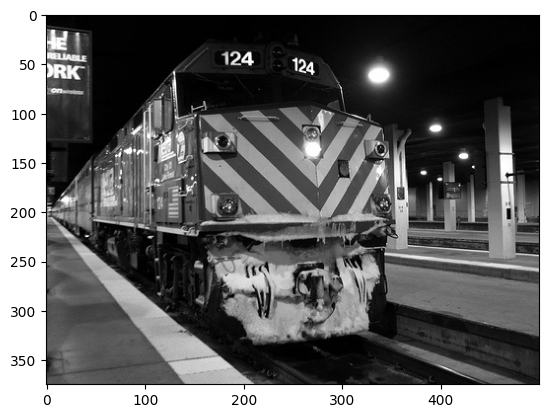

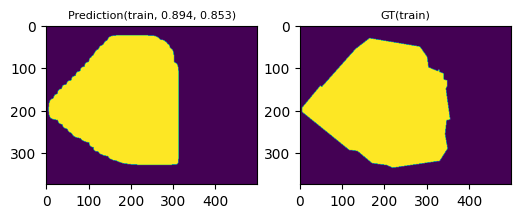

In [10]:
sample = dataset[3]
plt.imshow(Converter.tensor_to_numpy_for_image(sample[0]))
Task.show_comparison_for_one_sample(model, sample, device, iou_threshold=0.5, mask_binary_threshold=0.1)